# Figure 6

In Figure 6, we are attempting to estimate just how wrong would our estimates of epistasis be if we didn't account for phenotypic scale. For each data set, we fit the genotype-phenotype map with a nonlinear model and a linear model and compared their estimated coefficients. 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gpmap import GenotypePhenotypeMap
from epistasis import plot
from epistasis.models import EpistasisPowerTransform, EpistasisLinearRegression
from epistasis.stats import pearson

path = "../datasets/"

# Data set I

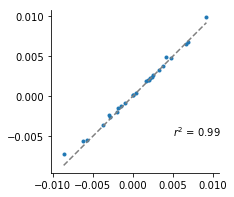

In [9]:
dataset = path + "khan.json"

# Fit with nonlinear model
power = EpistasisPowerTransform.read_json(dataset, order=5, model_type="global")
power.fit(lmbda=-1, A=1, B=0)
plinear = power.Linear.predict()
nonlinear = EpistasisLinearRegression.read_data(power.gpm.wildtype, power.gpm.genotypes, plinear, model_type="global", order=5)
nonlinear.fit()

linear = EpistasisLinearRegression.read_json(dataset, order=5, model_type="global")
linear.fit()

# Plot correlation
x = np.array(linear.epistasis.values[6:])
y = np.array(nonlinear.epistasis.values[6:])
fig, ax = plot.corr(x,y, figsize=(3,3))
r2 = pearson(x,y)**2
ax.annotate("$r^2$ = " + str(round(r2,2)), xy=(0.005,-.005))

# Data set II

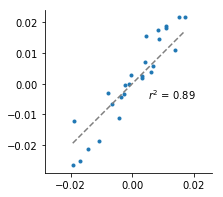

In [14]:
dataset = path + "krug1.json"

# Fit with nonlinear model
power = EpistasisPowerTransform.read_json(dataset, order=5, model_type="global")
power.fit(lmbda=-.5, A=1, B=0)
plinear = power.Linear.predict()
nonlinear = EpistasisLinearRegression.read_data(power.gpm.wildtype, power.gpm.genotypes, plinear, model_type="global", order=5)
nonlinear.fit()

linear = EpistasisLinearRegression.read_json(dataset, order=5, model_type="global")
linear.fit()

# Plot correlation
x = np.array(linear.epistasis.values[6:])
y = np.array(nonlinear.epistasis.values[6:])
fig, ax = plot.corr(x,y, figsize=(3,3))
r2 = pearson(x,y)**2
ax.annotate("$r^2$ = " + str(round(r2,2)), xy=(0.005,-.005))

## Data set III

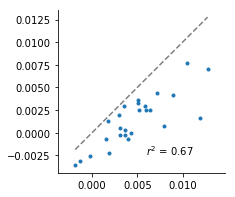

In [17]:
dataset = path + "weinreich.json"

# Fit with nonlinear model
power = EpistasisPowerTransform.read_json(dataset, order=5, model_type="global")
power.fit(lmbda=-1, A=0, B=0)
plinear = power.Linear.predict()
nonlinear = EpistasisLinearRegression.read_data(power.gpm.wildtype, power.gpm.genotypes, plinear, model_type="global", order=5)
nonlinear.fit()

linear = EpistasisLinearRegression.read_json(dataset, order=5, model_type="global")
linear.fit()

# Plot correlation
x = np.array(linear.epistasis.values[6:])
y = np.array(nonlinear.epistasis.values[6:])
fig, ax = plot.corr(x,y, figsize=(3,3))
r2 = pearson(x,y)**2
ax.annotate("$r^2$ = " + str(round(r2,2)), xy=(0.006,-.0025))

## Data set IV

Data set IV was published as $\Delta G$s, but were given to us as $k_a$s. Before fitting with a nonlinear epistasis model, we converted the values to $\Delta G$s to be consistent with the literature.

In [19]:
dataset = path + "anderson.json"

# gas constant and temperature
R = 1.9872036e-3
T = 293

gpm = GenotypePhenotypeMap.read_json(dataset)
gpm.phenotypes = - np.log(gpm.phenotypes) * R * T 

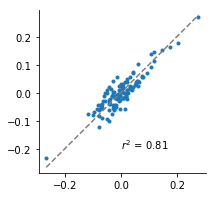

In [23]:
# Fit with nonlinear model
power = EpistasisPowerTransform.read_gpm(gpm, order=5, model_type="global")
power.fit(lmbda=-1, A=0, B=0)
plinear = power.Linear.predict()
nonlinear = EpistasisLinearRegression.read_data(power.gpm.wildtype, power.gpm.genotypes, plinear, mutations=power.gpm.mutations, model_type="global", order=5)
nonlinear.fit()

linear = EpistasisLinearRegression.read_gpm(gpm, order=5, model_type="global")
linear.fit()

# Plot correlation
x = np.array(linear.epistasis.values[9:])
y = np.array(nonlinear.epistasis.values[9:])
fig, ax = plot.corr(x,y, figsize=(3,3))
r2 = pearson(x,y)**2
ax.annotate("$r^2$ = " + str(round(r2,2)), xy=(0.0,-.2))